In [1]:
# creating circle(s) with random points
import numpy as np
def sample_sphere(n, dim = 3) : #n is the number of points
    # uniform sampling of the sphere (works in any dim)
    points = np.random.randn(n, dim)
    points /= np.linalg.norm(points, axis=1)[:,None] #puts everything into unit sphere >> unifrom distribution of 
    return points

points = sample_sphere(100, dim=2)


In [2]:
# plotting the points
import matplotlib.pyplot as plt

def plot_points(points) :
    if points.shape[1] == 2 :
        plt.figure()
        plt.scatter(points[:,0], points[:,1], s=5)
        plt.axis('equal')
        plt.show()
    if points.shape[1] == 3 :
        ax = plt.axes(projection='3d')
        ax.scatter3D(points[:,0], points[:,1], points[:,2], c=points[:,2], cmap='autumn')
        ##ax.set_aspect('equal') # does not work
        set_axes_equal_3D(ax)
        plt.show()

In [3]:
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import re
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import gudhi
import gtda # giotto-tda

from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram as plot_diagrams_plotly, plot_point_cloud as plot_points_plotly

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
class Tda:
    def __init__(self, points):
        self.points = points
    
    @staticmethod
    def get_diagrams(points):
        # Start with Rips filtration: compute Rips PDs (PH0, PH1, PH2) for this point cloud
        VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
        diagrams = VR.fit_transform([points])[0] # take single element from list
        return diagrams

In [11]:
# Functions to compute persistence diagrams (PDs) extract content from them
def nbpts_PH(diagrams) :
    ph0 = len(np.where(np.isclose(diagrams[:,2],0))[0])
    ph1 = len(np.where(np.isclose(diagrams[:,2],1))[0])
    ph2 = len(np.where(np.isclose(diagrams[:,2],2))[0])
    return ph0, ph1, ph2
    
def get_PH_dim(diagrams,dim) :
    ph0, ph1, ph2 = nbpts_PH(diagrams)
    if dim == 0 :
        diag = diagrams[:ph0, :2]
    if dim == 1 :
        diag = diagrams[ph0:ph0+ph1, :2]
    if dim == 2 :
        diag = diagrams[ph0 + ph1:, :2]
    return diag

def get_PH_alldims(diagrams):
    ph0, ph1, ph2 = nbpts_PH(diagrams)
    PH0 = diagrams[:ph0, :2]
    PH1 = diagrams[ph0:ph0+ph1, :2]
    PH2 = diagrams[ph0 + ph1:, :2]
    return PH0, PH1, PH2

# Functions to plot persistence diagrams
def plot_diagrams(diagrams, style = 'sep', diagonal = False) :
    PH_list = list(get_PH_alldims(diagrams))
    col_list = ['#E11033','#1A0DAB','#FF7900']# FBB117
    
    ph2 = len(PH_list[2])
    if ph2 != 0 :
        list_dims = [0,1,2]
        figsize = (10, 3.5)
    else :
        list_dims = [0,1]
        figsize = (6.5,3.5)
    
    if diagonal == False :
        for dim in list_dims :
            PHdim = PH_list[dim]
            PH_list[dim] = PHdim[ PHdim[:,0] < PHdim[:,1] ]
            
    if style == 'sep' :
        fig, axes = plt.subplots(1,len(list_dims), figsize = figsize)
        for dim in list_dims :
            ax = axes[dim]
            xmin = PH_list[dim][:,0].min()
            ymax = PH_list[dim][:,1].max()
            ax.plot([xmin, ymax],[xmin, ymax], c = 'k', alpha = .2, zorder = 1)
            ax.scatter(PH_list[dim][:,0], PH_list[dim][:,1], c = col_list[dim], s = 5, zorder = 2)
            ax.set_aspect('equal')
            ax.set_title('PH{}'.format(dim))
            ax.set_xlabel('birth')
            ax.set_ylabel('death')
        fig.tight_layout()
        plt.show()
        
    if style == 'tog' :
        fig = plt.figure(figsize = (4.5,4.5))
        xmin = min( [ PH_list[dim][:,0].min() for dim in [0,1,2] ] )
        ymax = max( [ PH_list[dim][:,1].max() for dim in [0,1,2] ] )
        plt.plot([xmin, ymax],[xmin, ymax], c = 'k',alpha = .2, label='_nolegend_')
        for dim in list_dims :
            plt.scatter(PH_list[dim][:,0], PH_list[dim][:,1], c = col_list[dim], s = 10)
        plt.legend(['PH0','PH1','PH2'])
        fig.tight_layout()
        plt.show()
    

In [6]:
p1 = Tda(points)

In [7]:
diagrams1 = Tda.get_diagrams(points)
ph0, ph1, ph2 = nbpts_PH(diagrams1)
PH0, PH1, PH2 = get_PH_alldims(diagrams1)

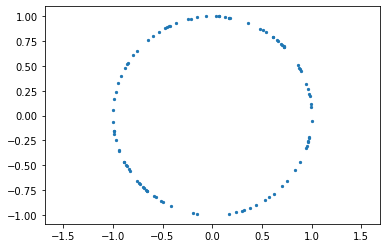

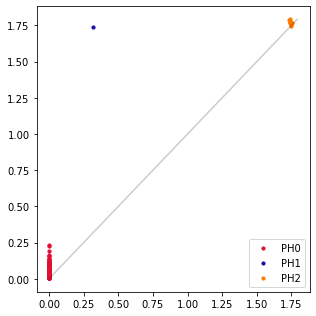

In [8]:
plot_points(p1.points)
plot_diagrams(diagrams1, 'tog')

## Two circles

In [12]:
#moving circle(s)
#barely touching
translation = [2,0]
t_matrix = matlib.repmat(translation, 100,1)
points_B = points + t_matrix

#not touching
points2 = sample_sphere(100, dim=2)
translation2 = [4,4]
t_matrix2 = matlib.repmat(translation2, 100,1)
points_2 = points2 + t_matrix2

#venndiagram
translation3 = [-0.4,0]
t3_matrix = matlib.repmat(translation3, 100, 1)
points_D = points + t3_matrix


In [13]:
#barely_touching = np.concatenate((points_B, points), axis=0)
not_touching = np.concatenate((points_2, points), axis=0)
#vend_2d = np.concatenate((points_D, points), axis=0)

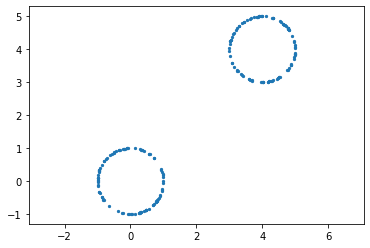

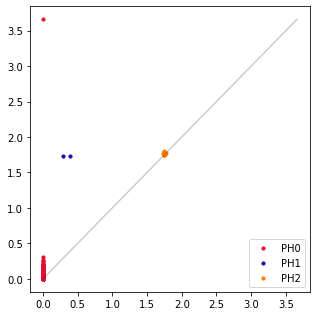

In [14]:
diagrams2 = Tda.get_diagrams(not_touching)
ph0, ph1, ph2 = nbpts_PH(diagrams2)
PH0, PH1, PH2 = get_PH_alldims(diagrams2)
plot_points(not_touching)
plot_diagrams(diagrams2, style = 'tog')

In [11]:
# diagrams1 = Tda.get_diagrams(barely_touching)
# ph0, ph1, ph2 = nbpts_PH(diagrams1)
# PH0, PH1, PH2 = get_PH_alldims(diagrams1)

# # diagrams2 = Tda.get_diagrams(not_touching)
# # ph0, ph1, ph2 = nbpts_PH(diagrams2)
# # PH0, PH1, PH2 = get_PH_alldims(diagrams2)

# diagrams3 = Tda.get_diagrams(vend_2d)
# ph0, ph1, ph2 = nbpts_PH(diagrams3)
# PH0, PH1, PH2 = get_PH_alldims(diagrams3)

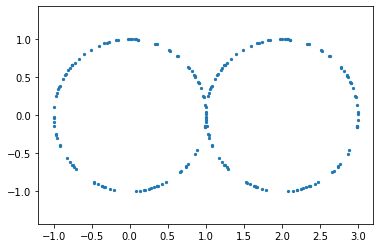

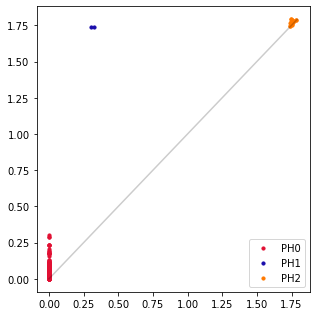

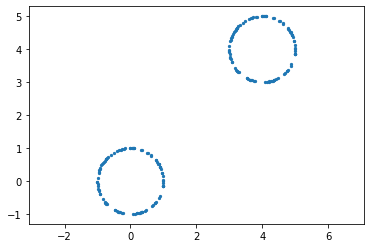

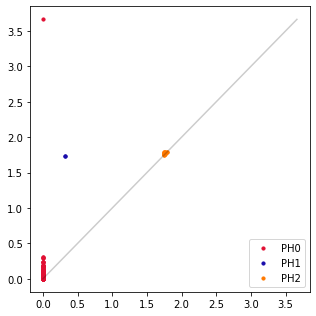

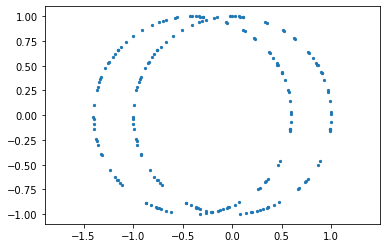

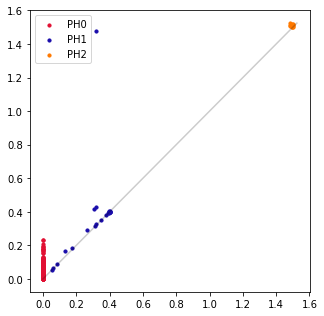

In [ ]:
plot_points(barely_touching)
plot_diagrams(diagrams1, style = 'tog')
plot_points(not_touching)
plot_diagrams(diagrams2, style = 'tog')
plot_points(vend_2d)
plot_diagrams(diagrams3, style = 'tog') #interesting discovery, when the translation is [-1,0] => causes a problem 
# maybe has to do with the speed ot rips-complex?

In [ ]:
#deforming circle(s)
A = [[1, 0], 
    [-1, 2]]
    #create matrix A (linear transformation)

points_a = np.matmul(points,A) 

B = [[0, 1], 
    [2, -1]]
    #create matrix B (linear transformation)

points_b = np.matmul(points,B) #reflected matrix A over y=x axis

C = [[-1, 0], 
    [1, 2]]
    #create matrix C (linear transformation)

points_c = np.matmul(points,C) #


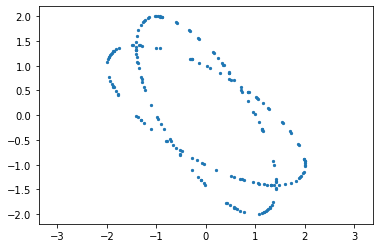

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 324x324 with 0 Axes>

In [ ]:
two_deformed_circles = np.concatenate((points_a, points_b), axis=0)
plot_points(two_deformed_circles)
diagrams4 = Tda.get_diagrams(two_deformed_circles)
ph0, ph1, ph2 = nbpts_PH(diagrams4)
PH0, PH1, PH2 = get_PH_alldims(diagrams4)
plot_diagrams(diagrams4, 'tog') #zero-size array to reduction operation minimum which has no identity

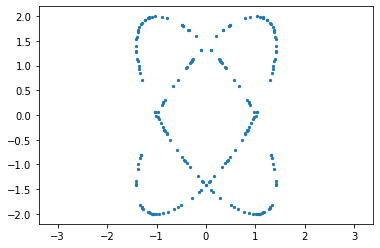

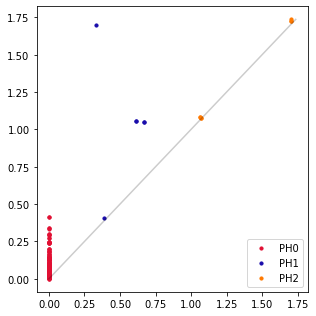

In [ ]:
two_deformed_circles = np.concatenate((points_a, points_c), axis=0)
plot_points(two_deformed_circles)
diagrams4 = Tda.get_diagrams(two_deformed_circles)
ph0, ph1, ph2 = nbpts_PH(diagrams4)
PH0, PH1, PH2 = get_PH_alldims(diagrams4)
plot_diagrams(diagrams4, 'tog') #zero-size array to reduction operation minimum which has no identity

## Three Circles

In [ ]:
import math
#barely touching
translation5 = [1,(math.sqrt(3))]
t5_matrix = matlib.repmat(translation5, 100, 1)
points_E = points + t5_matrix

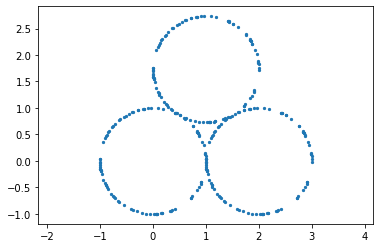

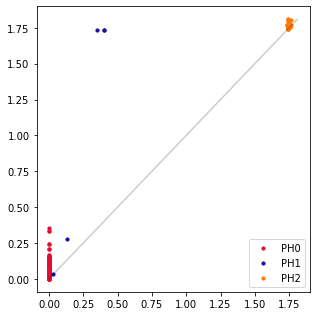

In [ ]:
threes = np.concatenate((points_B, points_E, points), axis=0)
plot_points(threes)
diagrams5 = Tda.get_diagrams(threes)
ph0, ph1, ph2 = nbpts_PH(diagrams5)
PH0, PH1, PH2 = get_PH_alldims(diagrams5)
plot_diagrams(diagrams5, 'tog')

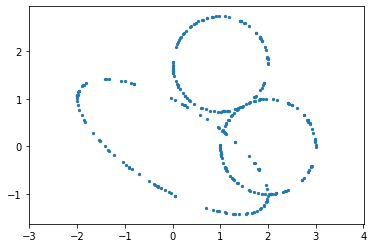

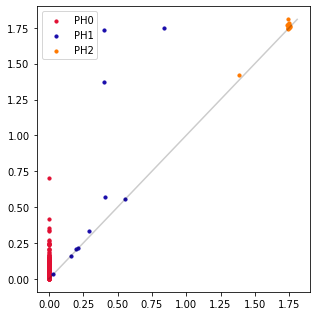

In [ ]:
threes = np.concatenate((points_B, points_E, points_b), axis=0)
plot_points(threes)
diagrams5 = Tda.get_diagrams(threes)
ph0, ph1, ph2 = nbpts_PH(diagrams5)
PH0, PH1, PH2 = get_PH_alldims(diagrams5)
plot_diagrams(diagrams5, 'tog')

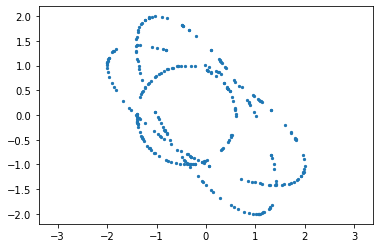

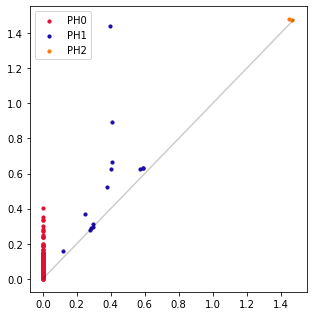

In [ ]:
threes = np.concatenate((points_a, points_D, points_b), axis=0)
plot_points(threes)
diagrams5 = Tda.get_diagrams(threes)
ph0, ph1, ph2 = nbpts_PH(diagrams5)
PH0, PH1, PH2 = get_PH_alldims(diagrams5)
plot_diagrams(diagrams5, 'tog')